<b>INTRODUCTION</b>
<br>
The dataset is a list of unicorn startup companies in the world from 2007 to 2021.
The dataset contains of following variables: Company, Valuation, Date, Country, City, Industry, Investors, year, month, day.

By looking at the properties of the dataset, I would like to find below information.

1. Top 5 companies has highest valuation during the period.
2. Number of startup companies each year.
3. Top 5 countries with highest number of startup companies.
4. The industry startup companies interest the most.
5. Top 10 regular investors.
6. The relationship of industry and valuation according to data in 2021.

In [305]:
# import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [306]:
# input data
file_path = "./World_Wide_Unicorn_Startups.csv"
data = pd.read_csv(file_path)

In [307]:
# examine first 5 rows
data.head(5)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1


<b>DATA CLEANING</b>

In [308]:
# Set Index to Company column
data.set_index("Company")

,Valuation,Date,Country,City,Industry,Investors,year,month,day
Company,,,,,,,,,
Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
...,...,...,...,...,...,...,...,...,...
YipitData,1.0,12/6/2021,United States,New York,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2021,6,12
Anyscale,1.0,12/7/2021,United States,Berkeley,Artificial Intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2021,7,12
Iodine Software,1.0,12/1/2021,United States,Austin,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2021,1,12


<b>Checking for missing values in the data</b>

In [309]:
# Check for missing values in the data
data.isna().sum()

Company       0
Valuation     0
Date          0
Country       0
City         15
Industry      0
Investors     0
year          0
month         0
day           0
dtype: int64

It seems like the dataset is well recorded, there are only 15 missing values in the City column. Since I am not using City, month and day columns in my analysis, I will drop these columns from the dataset.

In [310]:
data.drop(["City", "month", "day"], axis=1, inplace=True)

<b>Check for incositent data in following columns: Country, Industry and Investors</b>

<b>Country column<b>

In [311]:
# check for inconsistent data in Country column
data.Country.sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bermuda',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'India', 'Indonesia', 'Indonesia,',
       'Ireland', 'Israel', 'Japan', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Netherlands', 'Nigeria', 'Norway',
       'Philippines', 'Santa Clara', 'Senegal', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'United States,', 'Vietnam'], dtype=object)

By looking at the list of unique values of Country, I see that there are redundant characters in some values, which are punctuation. So I will update the data to remove the punctuation.

In [312]:
update_country = data.Country.str.translate(str.maketrans("", "", string.punctuation))
data.Country = update_country

In [313]:
# check the Country column after being updated
data.Country.sort_values().unique()


array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bermuda',
       'Brazil', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Hong Kong', 'India', 'Indonesia', 'Ireland', 'Israel',
       'Japan', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico',
       'Netherlands', 'Nigeria', 'Norway', 'Philippines', 'Santa Clara',
       'Senegal', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Vietnam'], dtype=object)

<b>Industry column</b>

In [314]:
# check for inconsistent data in Industry column
data.Industry.sort_values().unique()

array(['Artificial Intelligence', 'Artificial intelligence',
       'Auto & transportation', 'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Finttech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

The Industry column has two values "Artificial Intelligence" and "Artificial intelligence". The two values are the same, but Python treat them different because Python is case sensitive. Also, there is a typo mistake in "Finttech". I will update these values to the correct one.

In [315]:
# Update Industry column
updated_industry = data.Industry.replace(["Artificial intelligence", "Finttech"], ["Artificial Intelligence", "Fintech"])
data.Industry = updated_industry

In [316]:
# Check again Industry column
data.Industry.sort_values().unique()

array(['Artificial Intelligence', 'Auto & transportation',
       'Consumer & retail', 'Cybersecurity',
       'Data management & analytics', 'E-commerce & direct-to-consumer',
       'Edtech', 'Fintech', 'Hardware', 'Health',
       'Internet software & services', 'Mobile & telecommunications',
       'Other', 'Supply chain, logistics, & delivery', 'Travel'],
      dtype=object)

<b>Investors column</b>

In [317]:
# check for inconsistent data in Investors column
data.Investors.sort_values().unique()

array(["0      Sequoia Capital China, SIG Asia Investments, S...\n1      Founders Fund, Draper Fisher Jurvetson, Rothen...\n2            Khosla Ventures, LowercaseCapital, capitalG\n3      Institutional Venture Partners, Sequoia Capita...\n4      Sequoia Capital China, Blackbird Ventures, Mat...\n5      Khosla Ventures, Kleiner Perkins Caufield & By...\n6      Andreessen Horowitz, New Enterprise Associates...\n7             index Ventures, DST Global, Ribbit Capital\n8      Sequoia Capital, Redpoint e.ventures, Kaszek V...\n9                  Tencent Holdings, KKR, Smash Ventures\n10      Forerunner Ventures, Crosslink Capital, Homebrew\n11                Sequoia Capital, Thoma Bravo, Softbank\n12     Tencent Holdings, Lightspeed India Partners, S...\n13                        GGV Capital, ZhenFund, Tencent\n14     Hillhouse Capital Management, Boyu Capital, Se...\n15     SoftBank Group, Andreessen Horowitz, Temasek H...\n16          Tencent Holdings, Warbug Pincus, IDG Capital\n17    

It seems like that Investors columns has only 1 unique value for Investors column.
To confirm this, I will check how manys unique values in the column.

In [318]:
# check unique values counts
data.Investors.value_counts()

0      Sequoia Capital China, SIG Asia Investments, S...\n1      Founders Fund, Draper Fisher Jurvetson, Rothen...\n2            Khosla Ventures, LowercaseCapital, capitalG\n3      Institutional Venture Partners, Sequoia Capita...\n4      Sequoia Capital China, Blackbird Ventures, Mat...\n5      Khosla Ventures, Kleiner Perkins Caufield & By...\n6      Andreessen Horowitz, New Enterprise Associates...\n7             index Ventures, DST Global, Ribbit Capital\n8      Sequoia Capital, Redpoint e.ventures, Kaszek V...\n9                  Tencent Holdings, KKR, Smash Ventures\n10      Forerunner Ventures, Crosslink Capital, Homebrew\n11                Sequoia Capital, Thoma Bravo, Softbank\n12     Tencent Holdings, Lightspeed India Partners, S...\n13                        GGV Capital, ZhenFund, Tencent\n14     Hillhouse Capital Management, Boyu Capital, Se...\n15     SoftBank Group, Andreessen Horowitz, Temasek H...\n16          Tencent Holdings, Warbug Pincus, IDG Capital\n17            

As we can see, there is only one value with 936 counts. So all the values in Investors column are identical.
By looking at the value, I can see that the value contains all the investors records for each row indicated by "\n..." pattern. So I will split the data and update the dataset with correct Investors record respectively.

In [319]:
# get unique value
unique_investors = data.Investors.unique()[0]

# split the string and return list of record
investor_records = re.split("\n\d*", unique_investors)

# replace the string "0" in the first record
investor_records[0] = investor_records[0].replace("0","")

# left strip the string
investor_records = [re.sub("^\s*", "", record) for record in investor_records]

In [320]:
investor_records

['Sequoia Capital China, SIG Asia Investments, S...',
 'Founders Fund, Draper Fisher Jurvetson, Rothen...',
 'Khosla Ventures, LowercaseCapital, capitalG',
 'Institutional Venture Partners, Sequoia Capita...',
 'Sequoia Capital China, Blackbird Ventures, Mat...',
 'Khosla Ventures, Kleiner Perkins Caufield & By...',
 'Andreessen Horowitz, New Enterprise Associates...',
 'index Ventures, DST Global, Ribbit Capital',
 'Sequoia Capital, Redpoint e.ventures, Kaszek V...',
 'Tencent Holdings, KKR, Smash Ventures',
 'Forerunner Ventures, Crosslink Capital, Homebrew',
 'Sequoia Capital, Thoma Bravo, Softbank',
 'Tencent Holdings, Lightspeed India Partners, S...',
 'GGV Capital, ZhenFund, Tencent',
 'Hillhouse Capital Management, Boyu Capital, Se...',
 'SoftBank Group, Andreessen Horowitz, Temasek H...',
 'Tencent Holdings, Warbug Pincus, IDG Capital',
 'Accel Partners, Sequoia Capital',
 'Tiger Global Management, Sequoia Capital China...',
 'Tiger Global Management, Insight Partners, DST...',

Now I have a list of 936 values corresponded to 936 records in the dataset. Since the record contains incomplete name of the investor, I decide to remove those name and keep the complete name only.
I also decide to create other columns to store indivual investor for each record rather than store them together in a single cell.

In [321]:
# split the value in each record and return list with only complete name of investor
investor_records = [value.split(",") for value in investor_records]
investor_records = [[investor for investor in record if investor.find("...")==-1] for record in investor_records]    

In [322]:
# maximum number of investors in Investor column
max([len(record) for record in investor_records])

4

In [323]:
# create 4 new columns to store individual investor
investor=[]
investor_2=[]
investor_3=[]
investor_4=[]
investors_list=[investor, investor_2, investor_3, investor_4]

In [324]:
# store investor of each record to 4 investor columns respectively
for record in investor_records:
    for i in range(len(investors_list)):
        try:
            investors_list[i].append(record[i].strip().lower())
        except:
            investors_list[i].append(None)

In [325]:
# combine 4 new columns into data and drop Investor column
data.drop("Investors", inplace=True, axis=1)
data["Investor"] = investor
data["Investor_2"] = investor_2
data["Investor_3"] = investor_3
data["Investor_4"] = investor_4

In [326]:
data.head()

,Company,Valuation,Date,Country,Industry,year,Investor,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,4/7/2017,China,Artificial Intelligence,2017,sequoia capital china,sig asia investments,None,None
1,SpaceX,100.3,12/1/2012,United States,Other,2012,founders fund,draper fisher jurvetson,None,None
2,Stripe,95.0,1/23/2014,United States,Fintech,2014,khosla ventures,lowercasecapital,capitalg,None
3,Klarna,45.6,12/12/2011,Sweden,Fintech,2011,institutional venture partners,None,None,None
4,Canva,40.0,1/8/2018,Australia,Internet software & services,2018,sequoia capital china,blackbird ventures,None,None


<b>EXPLORATORY DATA ANALYSIS</b>

<b>1. Top five highest valuation companies</b>

In [327]:
top_5_companies = data.sort_values(by="Valuation", ascending=False).head(5)
top_5_companies

,Company,Valuation,Date,Country,Industry,year,Investor,Investor_2,Investor_3,Investor_4
0,Bytedance,140.0,4/7/2017,China,Artificial Intelligence,2017,sequoia capital china,sig asia investments,None,None
1,SpaceX,100.3,12/1/2012,United States,Other,2012,founders fund,draper fisher jurvetson,None,None
2,Stripe,95.0,1/23/2014,United States,Fintech,2014,khosla ventures,lowercasecapital,capitalg,None
3,Klarna,45.6,12/12/2011,Sweden,Fintech,2011,institutional venture partners,None,None,None
4,Canva,40.0,1/8/2018,Australia,Internet software & services,2018,sequoia capital china,blackbird ventures,None,None


<AxesSubplot: title={'center': 'Top five companies with highest valuation'}, xlabel='Company', ylabel='Valuation'>

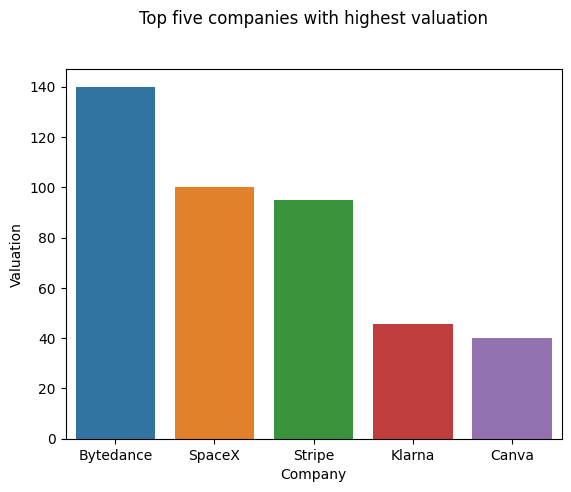

In [328]:
plt.title("Top five companies with highest valuation", y=1.1)
sns.barplot(top_5_companies,y="Valuation", x="Company")

<b>2. Number of startup companies in each year</b>

In [329]:
companies_per_year = data.groupby("year").Company.count()
companies_per_year

year
2007      1
2010      1
2011      2
2012      4
2013      3
2014     13
2015     37
2016     22
2017     46
2018    107
2019    110
2020    110
2021    480
Name: Company, dtype: int64

<AxesSubplot: xlabel='year', ylabel='number of companies'>

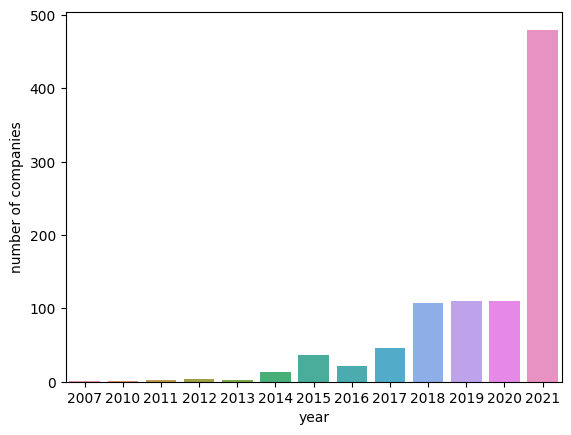

In [330]:
plt.ylabel("number of companies")
sns.barplot(x=companies_per_year.index, y=companies_per_year.values)

<b>3. Top five countries with highest number of startup companies</b>

In [331]:
top_5_countries = data.groupby("Country").Company.count()
top_5_countries = top_5_countries.sort_values(ascending=False).head(5)


<AxesSubplot: title={'center': 'Top five countries with highest number of startup companies'}, xlabel='Country'>

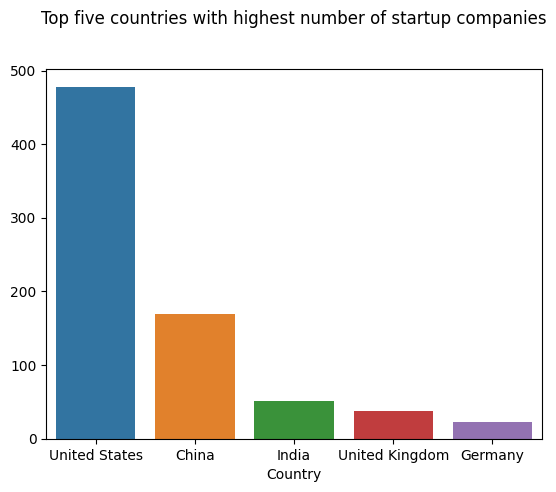

In [332]:
plt.title("Top five countries with highest number of startup companies", y=1.1)
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)

<b>4. Most interested industry</b>

In [333]:
industry = data.groupby("Industry").Company.count()
industry = industry.sort_values(ascending=False)

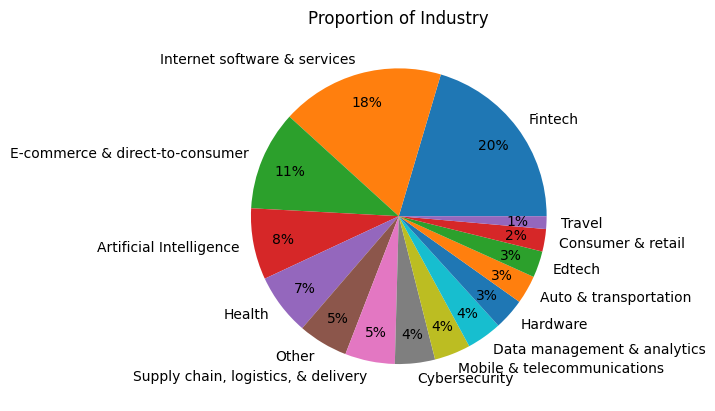

In [334]:
plt.title("Proportion of Industry")
plt.pie(industry, labels=industry.index, autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1)
plt.show()

In [335]:
# Number of startup companies per year detailed by industry
industry_and_year = data.groupby(by=["Industry", "year"]).Company.count()
industry_and_year = pd.DataFrame(industry_and_year.reset_index())

<AxesSubplot: xlabel='year', ylabel='number of companies'>

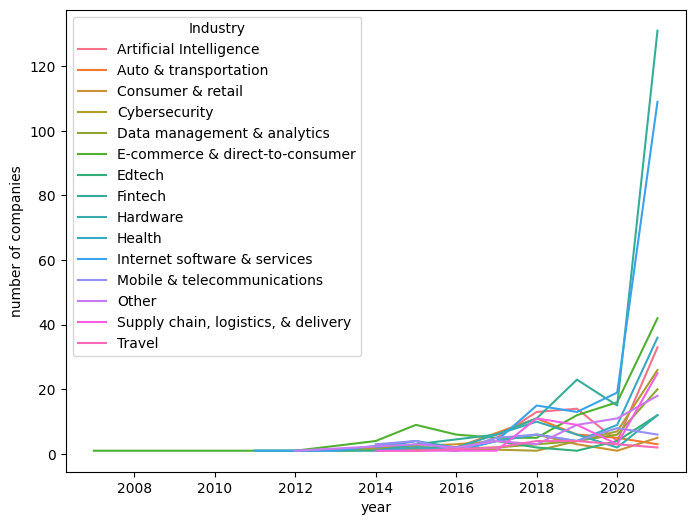

In [336]:
plt.figure(figsize=(8,6))
plt.ylabel("number of companies")
sns.lineplot(data=industry_and_year, x="year", y="Company", hue="Industry")

<b>5. Top five regular investors</b>

In [337]:
# concat all investor columns
investor_data = pd.concat([data.Investor, data.Investor_2, data.Investor_3, data.Investor_4], ignore_index=True)

In [338]:
# drop n/a values
investor_data.dropna(inplace=True)

In [339]:
# get top 5 regular investors
top_5_investors = investor_data.value_counts().sort_values(ascending=False).head(5)
top_5_investors


accel                    48
sequoia capital china    37
insight partners         36
andreessen horowitz      32
softbank group           30
dtype: int64

<b>6. The relationship of industry and valuation according to data in 2021</b>

In [340]:
data_2021 = data.loc[data.year==2021]

<AxesSubplot: xlabel='Valuation', ylabel='Industry'>

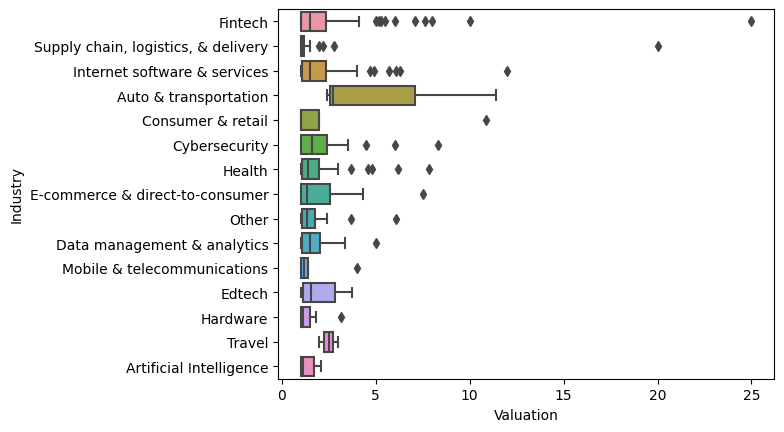

In [341]:
sns.boxplot(data=data_2021, y="Industry", x="Valuation")

As we can see from the boxplots, by ignoring the outliers, in 2021 companies in Auto & transportation has higer valuation compared to other industries.